In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Memuat data dari file yang diunggah
train_data_path = '/content/drive/MyDrive/skripsi/datatrain2.csv'
test_data_path = '/content/drive/MyDrive/skripsi/datatest2.csv'

# Membaca dataset
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head(), test_data.head()


(           NIM                  Nama Mahasiswa  Nilai1  Nilai2  Nilai3  \
 0  20104410016  Muhammad Mahasin Bagus Saputro      88      90      83   
 1  20104410017           Maysa Aulia Salsabila      77      70      83   
 2  20104410019           Muhammad Iqbal Raihan      90     100      93   
 3  20104410021              Zidhan Hadi Irawan      76      80      86   
 4  20104410022                   Dova Ramadhan      86      80      76   
 
    Nilai4  Nilai5  Nilai6  Nilai7  Nilai8  Nilai9  Nilai10  Target  
 0      77      80      80      75      84      78       86       0  
 1      76      84      83      83      85      80       84       0  
 2      94      88      89      90      87      81       89       1  
 3      80      79      79      74      84      77       88       0  
 4      77      79      78      23      52      41        9       0  ,
            NIM           Nama Mahasiswa  Nilai1  Nilai2  Nilai3  Nilai4  \
 0  20104410002           El Risko Noval      86   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Menghapus kolom yang tidak diperlukan
train_features = train_data.drop(['NIM', 'Nama Mahasiswa', 'Target'], axis=1)
train_targets = train_data['Target']
test_features = test_data.drop(['NIM', 'Nama Mahasiswa', 'Target'], axis=1)
test_targets = test_data['Target']

# Normalisasi data
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Menampilkan beberapa data yang telah dinormalisasi
pd.DataFrame(train_features_scaled, columns=train_features.columns).head(),
pd.DataFrame(test_features_scaled, columns=test_features.columns).head()

,Nilai1,Nilai2,Nilai3,Nilai4,Nilai5,Nilai6,Nilai7,Nilai8,Nilai9,Nilai10
0,0.044255,-1.074573,-0.919783,-0.511946,-2.089371,-1.226889,-0.090354,0.281310,0.232595,0.272609
1,0.655783,0.912472,1.264702,1.597518,1.072420,1.041197,0.547285,0.437746,0.591522,0.364690
2,0.961547,0.813120,-1.575129,0.191209,1.423731,1.293207,0.547285,0.489891,0.322327,0.410731
3,0.961547,0.912472,1.483151,1.831903,0.721110,1.041197,0.596334,0.489891,0.681254,0.318649
4,0.044255,0.912472,-1.575129,-0.043176,-2.089371,0.033159,0.449187,0.907053,0.591522,0.502812


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Membangun model neural network dengan dropout dan l2 regularization
model = Sequential([
    Dense(10, input_dim=train_features_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Meningkatkan Dropout
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Meningkatkan Dropout
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.0001)  # Mengurangi learning rate lebih lanjut
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.00001)
history = model.fit(
    train_features_scaled, train_targets, epochs=500, batch_size=16,
    verbose=1, validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=20,
                             restore_best_weights=True), reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_features_scaled, test_targets)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/500
2/2 [==============================] - 2s 299ms/step - loss: 1.6929 - accuracy: 0.4333 - val_loss: 0.8473 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 1.5167 - accuracy: 0.3667 - val_loss: 0.8406 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 3/500
2/2 [==============================] - 0s 51ms/step - loss: 1.3953 - accuracy: 0.4333 - val_loss: 0.8337 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 4/500
2/2 [==============================] - 0s 33ms/step - loss: 1.9440 - accuracy: 0.4000 - val_loss: 0.8271 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 5/500
2/2 [==============================] - 0s 34ms/step - loss: 1.4038 - accuracy: 0.4667 - val_loss: 0.8181 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 6/500
2/2 [==============================] - 0s 34ms/step - loss: 0.8655 - accuracy: 0.4667 - val_loss: 0.8106 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 7/500
2/2 [==============================] - 0s 51m

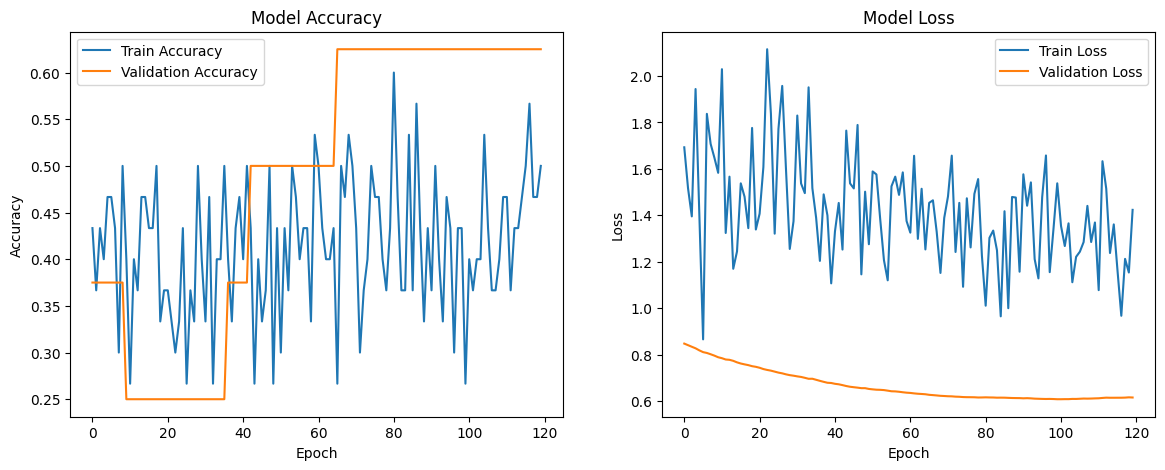

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(test_features_scaled, test_targets)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Membuat prediksi pada data test
predictions = model.predict(test_features_scaled)
predicted_classes = (predictions > 0.5).astype(int).flatten()

results = pd.DataFrame({
    'NIM': test_data['NIM'],
    'Nama Mahasiswa': test_data['Nama Mahasiswa'],
    'Predicted Class': predicted_classes,
    'Target asli' : test_data['Target']
})

print(results)

1/1 [==============================] - 0s 27ms/step - loss: 0.7637 - accuracy: 0.5556
Test Loss: 0.763744056224823, Test Accuracy: 0.5555555820465088
1/1 [==============================] - 0s 120ms/step
           NIM           Nama Mahasiswa  Predicted Class  Target asli
0  20104410002           El Risko Noval                0            0
1  20104410004          Indra Kurniawan                1            0
2  20104410006  Bagus Kurniawan Pratama                1            1
3  20104410010     Muhammad Fahmi Ahsan                0            0
4  20104410011   Nana Aidia Fitra Sania                0            1
5  20104410012  Firsta Rahmania Sucahyo                1            1
6  20104410013            Bahrur Rochim                0            1
7  20104410014            Nurul Hidayah                1            1
8  20104410015   Muayyin Wafi Khoiriyah                0            1
